In [102]:
import pandas as pd
import plotly.express as px

# Função para preencher os valores vazios da coluna 'Region' com a região mais comum em um país específico
def preencher_regiao_comum_pais(df, pais):
   
    # Filtrando as linhas onde o valor na coluna 'Country' é o país especificado
    filtro_pais = df[df['Country'] == pais]
    
    # Contagem de ocorrências de cada cidade no país especificado
    contagem_cidades_pais = filtro_pais['City'].value_counts()
    
    # Se houver apenas uma cidade mais comum no país, você pode usá-la para preencher os valores vazios da coluna 'Region'
    cidade_mais_comum_pais = contagem_cidades_pais.idxmax()
    
    # Preencher os valores vazios da coluna 'Region' com a região da cidade mais comum da coluna Country
    df.loc[(df['Country'] == pais) & (df['Region'].isnull()), 'Region'] = cidade_mais_comum_pais
    
    return df

# Carregar nossa base para analise 
df = pd.read_csv("Cities1.csv")


# Iterar sobre cada país com valores nulos na coluna 'Region' e aplicar a função preencher_regiao_comum_pais
for pais in df[df['Region'].isnull()]['Country'].unique():
    df = preencher_regiao_comum_pais(df, pais)

display(df.head(10))



,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,Berlin,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435
5,Bern,Canton of Bern,Switzerland,94.318182,12.500000
6,Geneva,Canton of Geneva,Switzerland,71.538462,17.372881
7,Zurich,Canton of Zurich,Switzerland,83.809524,10.714286
8,Basel,Bern,Switzerland,81.666667,26.923077
9,London,England,United Kingdom,37.042254,40.716374


In [93]:
#Ultiliza como parâmetro a coluna a ser calculada
def statisticsDescribe(column):
    
    #Cria uma nova série pandas vazia,que irá receber os valores como parametro padrão describe() e irá retornar seus respectivos resultados
    statistics = pd.Series({
        'count': column.count(),
        'mean': column.mean(),
        'std': column.std(),
        'min': column.min(),
        '25%': column.quantile(0.25),
        '50%': column.median(),
        '75%': column.quantile(0.75),
        'max': column.max()
    })
    return statistics

# Exemplo de uso:
stats = statisticsDescribe(df['AirQuality'])
contagem = stats['count']
media = stats['mean']
desvio_padrao = stats['std']
minimo = stats['min']
primeiro_quartil = stats['25%']
mediana = stats['50%']
terceiro_quartil = stats['75%']
maximo = stats['max']

# Apresentação dos dados 
print("===|Estatísticas Descritivas|===")
print("\Contagem:", contagem)
print("Média:", media)
print("Desvio Padrão:", desvio_padrao)
print("Mínimo:", minimo)
print("Primeiro Quartil:", primeiro_quartil)
print("Mediana:", mediana)
print("Terceiro Quartil:", terceiro_quartil)
print("Máximo:", maximo)


===|Estatísticas Descritivas|===
\Contagem: 3963.0
Média: 62.25345173956421
Desvio Padrão: 30.94475340271575
Mínimo: 0.0
Primeiro Quartil: 37.686567165
Mediana: 69.44444444
Terceiro Quartil: 87.5
Máximo: 100.0


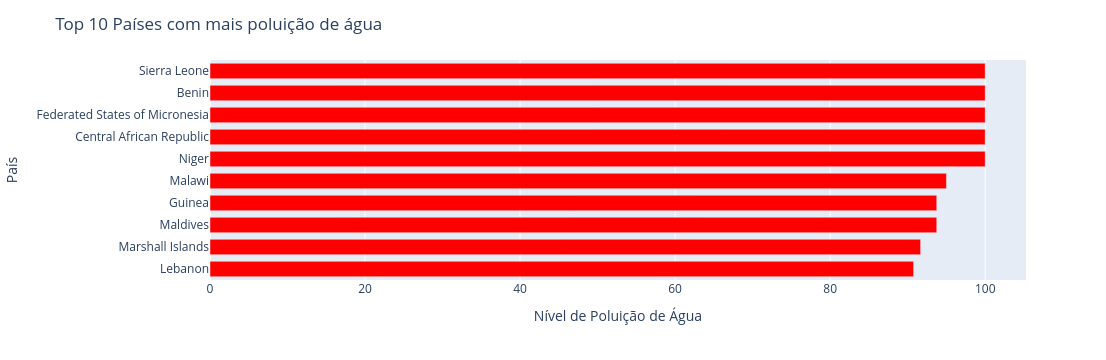

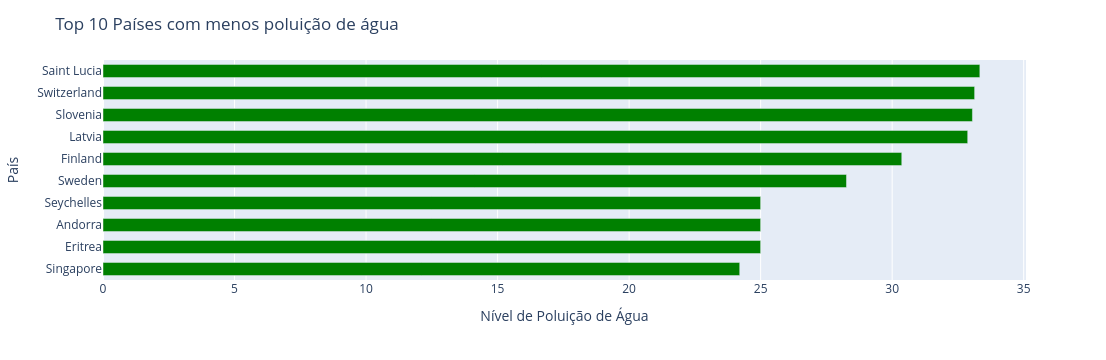

In [91]:
def waterPolluationCountries():    
# Exclui os valores que comecem com 0 para uma analise mais precisa 
    df_filtered = df[df['WaterPollution'] != 0]
    
    # Calcular a média de poluição de água por país
    lugares_por_poluição = df_filtered.groupby('Country')['WaterPollution'].mean().sort_values()
    
    # Selecionar os 10 primeiros lugares mais poluentes e os 10 menos poluentes
    top_10_poluidores = lugares_por_poluição.tail(10)
    bottom_10_poluidores = lugares_por_poluição.head(10)
    
    # Criação do gráfico com os lugares mais poluentes
    fig = px.bar(y=top_10_poluidores.index, x=top_10_poluidores.values, labels={'y':'País', 'x':'Nível de Poluição de Água'}, orientation='h')
    fig.update_layout(title='Top 10 Países com mais poluição de água')
    fig.update_traces(marker_color='red', width=0.7)
    fig.show()
    
    # Exibição do gráfico 
    fig2 = px.bar(y=bottom_10_poluidores.index, x=bottom_10_poluidores.values, labels={'y':'País', 'x':'Nível de Poluição de Água'}, orientation='h')
    fig2.update_layout(title='Top 10 Países com menos poluição de água')
    fig2.update_traces(marker_color='green', width=0.6)
    fig2.show()

waterPolluationCountries()

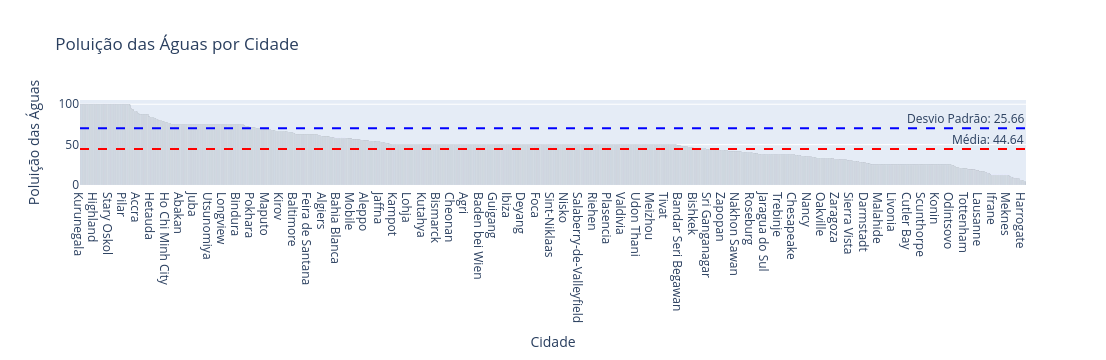

In [49]:
def PoluationWater(df):
    # Calcula a média e o desvio padrão da poluição das águas
    media_poluicao_aguas = df['WaterPollution'].mean()
    desvio_padrão_poluicao_aguas = df['WaterPollution'].std()

    # As 10 cidades menos poluentes e ordena de forma ascendente
    cidades_menos_poluentes = df[df['WaterPollution'] > 0].groupby('City')['WaterPollution'].mean().sort_values().head(3963)

    
    grafico = px.bar(x=cidades_menos_poluentes.index[::-1], y=cidades_menos_poluentes.values[::-1], title="Poluição das Águas por Cidade")
    grafico.add_hline(y=media_poluicao_aguas, line_dash="dash", line_color="red", annotation_text=f"Média: {media_poluicao_aguas:.2f}")
    grafico.add_hline(y=media_poluicao_aguas + desvio_padrão_poluicao_aguas, line_dash="dash", line_color="blue", annotation_text=f"Desvio Padrão: {desvio_padrão_poluicao_aguas:.2f}")

    grafico.update_xaxes(title="Cidade")
    grafico.update_yaxes(title="Poluição das Águas")
    grafico.update_traces(marker_color="black")

    # Exibe o gráfico
    grafico.show()


PoluationWater(df)


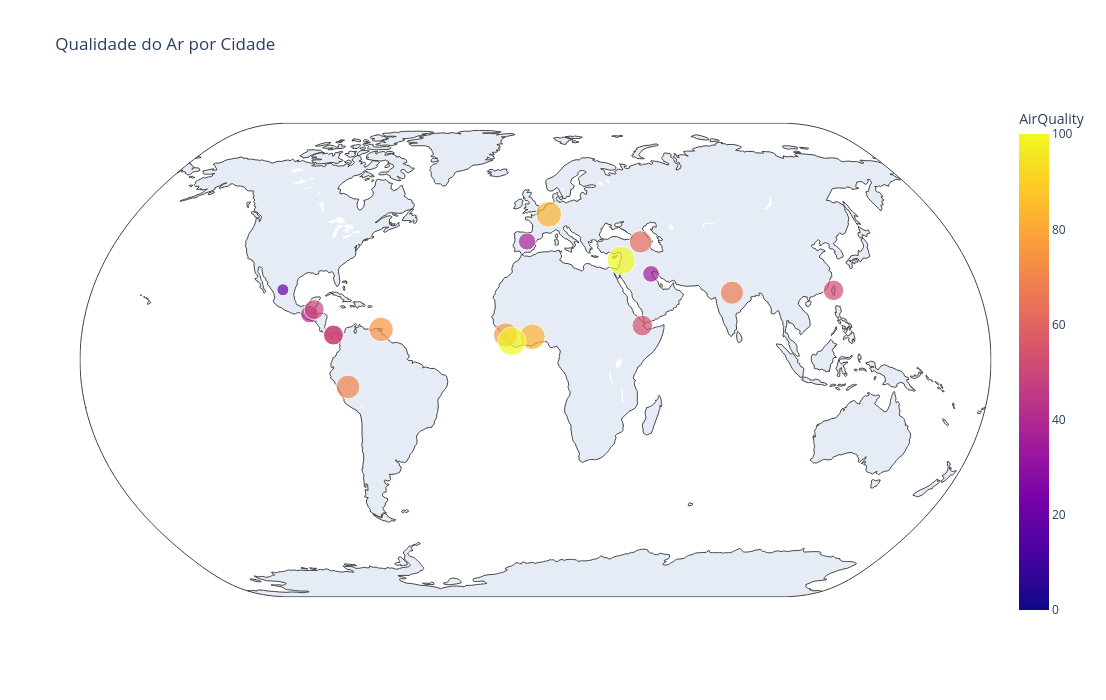

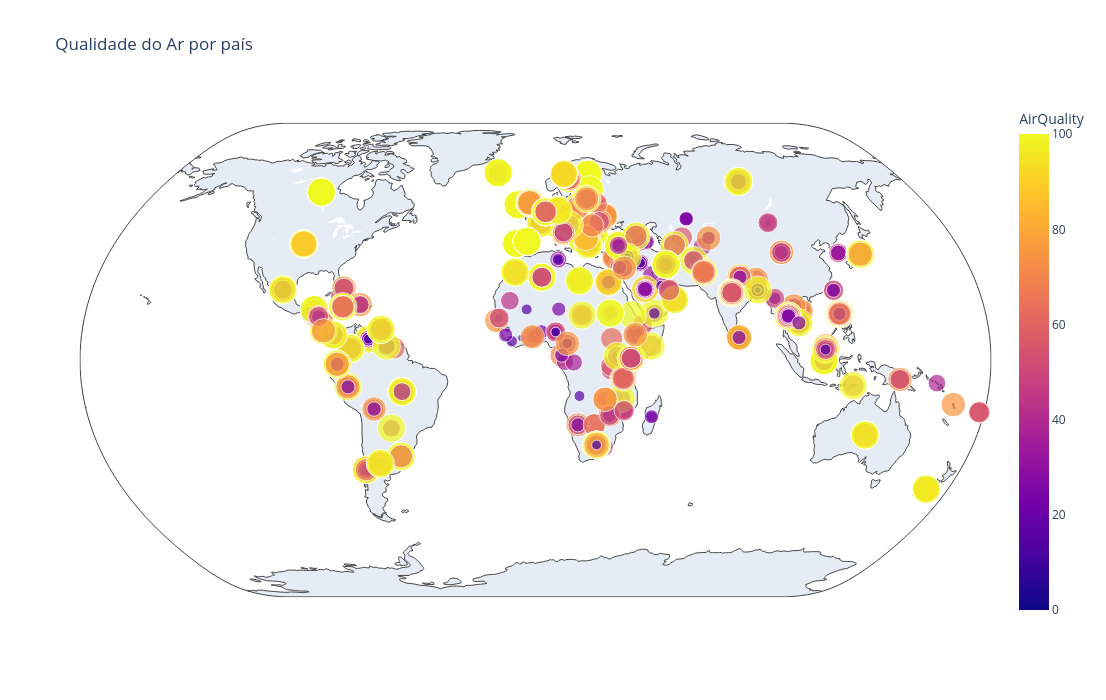

Qualidade do ar por cidade:
City
Sao Bras de Alportel    100.0
Goose Creek             100.0
Ribeseya                100.0
Hickory                 100.0
Richland                100.0
                        ...  
Bajos de Haina            0.0
Bakaata                   0.0
Sakon Nakhon              0.0
Gravesend                 0.0
Milagro                   0.0
Name: AirQuality, Length: 3796, dtype: float64
Qualidade do Ar por País:
Country
Federated States of Micronesia    100.000000
Eritrea                           100.000000
Palau                             100.000000
Finland                            95.771386
Estonia                            94.190796
                                     ...    
People's Republic of China         10.761067
Liberia                             8.333333
Cote d'Ivoire                       6.944444
Guinea                              5.000000
Central African Republic            0.000000
Name: AirQuality, Length: 177, dtype: float64


In [101]:
def QualityAir():
# Qualidade do ar por região (cidade)
    fig = px.scatter_geo(df, 
                     locations="City", 
                     locationmode="country names",
                     color="AirQuality",
                     hover_name="City", 
                     size="AirQuality",
                     projection="natural earth",
                     title="Qualidade do Ar por Cidade")

    fig.update_layout(width=890, height=700)
    fig.show()

#Qualidade de ar por país 
    fig = px.scatter_geo(df, 
                     locations="Country", 
                     locationmode="country names",
                     color="AirQuality",
                     hover_name="City", 
                     size="AirQuality",
                     projection="natural earth",
                     title="Qualidade do Ar por país")

    fig.update_layout(width=890, height=700)
    fig.show()
    
    
QualityAir()

media_qualidade_por_pais = df.groupby('Country')['AirQuality'].mean()
media_quantidade_por_cidade = df.groupby('City')['AirQuality'].mean()

media_quantidade_por_cidade = media_quantidade_por_cidade.sort_values(ascending=False)

# Ordena os países pela média da qualidade do ar em ordem decrescente
media_qualidade_por_pais = media_qualidade_por_pais.sort_values(ascending=False)

print("Qualidade do ar por cidade:")
print(media_quantidade_por_cidade)

print("Qualidade do Ar por País:")
print(media_qualidade_por_pais)